##### First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
#uploading the spam dataset
df=pd.read_csv('C://Users//Admin//Desktop//Ass//spam.csv',encoding="cp1252")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [64]:
#deleting the unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [65]:
#renaming the columns for better understanding
df.rename(columns={'v1':'label','v2':'texts'},inplace=True)

In [66]:
df.head()

,label,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### As we can see that there are only two columns are given; one is label and other is texts and here our goal is to predict whether the texts are spam or ham. Since here the input is in the form of sentences or corpus so we can't use machine learning model directly as we can't use encoding techniques from machine learning libraries to encode them into vector. So here we are going to use "Natural Learning Process (NLP) techniques as  Tokenization,Stemming,Lemmatization,Stopwords,Ngrams,Bag of Words(BOW),Word2Vec,AvgWord2Vec" for feature representation and once when we extract our feature in form of vector will use machine learning libraries to train and test our model accuracy and other parameters.


 ham     4825
spam     747
Name: label, dtype: int64


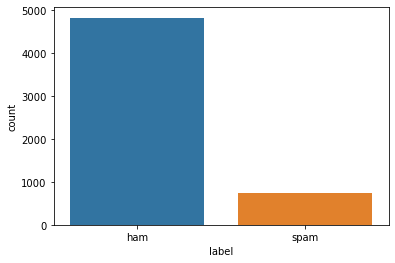

In [13]:
sns.countplot(df.label)
print('\n',df.label.value_counts())

##### Point to note that  here in the above graph our class is imbalanced so we must need to balance our classes so that we don't get overfitting or underfitting in our data.(will balance it later in this notebook)
There are 4827 ham texts and 747 spam texts in our dataset

In [14]:
#extracting the data's
df.loc[15] #This will give all the data present in 15th row

label                                                 spam
texts    XXXMobileMovieClub: To use your credit, click ...
Name: 15, dtype: object

In [15]:
df.texts.loc[15] #This will give texts column data present in 15th row

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [16]:
df.loc[25]

label                                                  ham
texts    Just forced myself to eat a slice. I'm really ...
Name: 25, dtype: object

In [17]:
df.texts.loc[25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [18]:
df.loc[1000]

label                        ham
texts    No..but heard abt tat..
Name: 1000, dtype: object

In [19]:
df.texts.loc[1000]

'No..but heard abt tat..'

In [20]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 5572
Columns are 2
Shape is (5572, 2)


In [21]:
#two dimensional dataframe
df.ndim

2

In [22]:
#Total datapoints in this dataframe
df.size

11144

In [23]:
#indexes are-
df.index

RangeIndex(start=0, stop=5572, step=1)

In [24]:
#columns of the dataframes are-
df.columns

Index(['label', 'texts'], dtype='object')

In [25]:
df.dtypes

label    object
texts    object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   texts   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [27]:
df.isnull().sum()

label    0
texts    0
dtype: int64

##### No null values are prsent in our dataset and each columns are of the object data type. Also, column label is in the form of category hence will encode it into binary classes. This represent that we have to use classification model going further

In [28]:
df.nunique()

label       2
texts    5169
dtype: int64

### Using NLP Technique
### Data cleaning and Text-Preprocessing

In [14]:
#importing NLP libraries
import re       #regular expression
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords           ###stopwords          
from nltk.stem.porter import PorterStemmer  ###stemming
ps=PorterStemmer()

In [32]:
stopwords.words('english') #displaying the stopwords of english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
#creating corpus to contain all the sentences or documents
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ',df['texts'][i])  #removing all the special character from the sentences except lower and upper case alphabets
    review.lower() #lowering each sentences
    review.split() #spliting
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=''.join(review) #joining
    corpus.append(review)   #appending the list

In [38]:
#getting the corpus of our texts dataset
corpus

['g unl jurng pn  crz   avlble nl n bug n gre wrl l e buffe    cne here g re w   ',
 'ok lr    jkng wf u n   ',
 'free enr n    wkl cp  wn fa cup fnl k    m       tex fa         receve enr quen  x re t c  ppl            ver   ',
 'u un   erl hr    u c lre hen    ',
 'nh i n  hnk he ge  uf  he lve run here hugh',
 'freemg he here rlng   been   week  nw n n wr bck  i  lke e fun u up fr  ll  tb k  xxx  chg  en          rcv',
 'even  brher  n lke  pek wh e  the re e lke  pen ',
 'a per ur reque  melle melle  oru mnnnungne nurungu ve   h been e  ur cllerune fr ll cller  pre     cp ur fren cllerune',
 'winner   a  vlue newrk cuer u hve been elece  receve       prze rewr  t cl cll              cl ce kl     vl    hur nl ',
 'h ur ble    nh r re  u r enle  upe  he le clur ble wh cer fr free  cll the mble upe c free n            ',
 'i  gnn be he n n  n  wn  lk bu h uff nre ngh  k  i ve cre enugh  ',
 'six chnce  wn cash  fr             pun x  csh   n en         c    p          tnc ppl repl hl  

In [39]:
len(corpus)

5572

# 1.Creating the models with the help of Bag of Words  (BOW)

In [40]:
### text_preprocessing---- word to vector transformation
### finding our features(x) with the help of BOW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,binary=True,ngram_range=(2,2)) #max_feature will give us top 2500 fatures where as ngram_range will give us vocabulary containg two words each
X=cv.fit_transform(corpus).toarray()

In [41]:
###our feature for BOW model
X ###we have converted each words of each sentences into vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
X.shape #there are 5572 rows and 2500 features

(5572, 2500)

In [43]:
X[1] #displaying vector for first sentence

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
X[10] #displaying vector for 10th sentence

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
cv.vocabulary_  ##we are getting all the unique vocabulary which is generated from our texts dataset

{'here re': 1054,
 'ok lr': 1555,
 'free enr': 673,
 'enr wkl': 510,
 'wkl cp': 2362,
 'quen re': 1678,
 're ppl': 1731,
 'hnk he': 1090,
 'he ge': 888,
 'he lve': 918,
 'here hugh': 1047,
 'freemg he': 681,
 'he here': 897,
 'week nw': 2247,
 'lke fun': 1288,
 'up fr': 2034,
 'fr ll': 637,
 'the re': 1950,
 'per ur': 1591,
 'ur reque': 2125,
 'reque melle': 1795,
 've been': 2158,
 'been ur': 56,
 'ur cllerune': 2067,
 'cllerune fr': 246,
 'll cller': 1304,
 'cller pre': 244,
 'pre cp': 1648,
 'cp ur': 327,
 'ur fren': 2084,
 'fren cllerune': 685,
 'vlue newrk': 2196,
 'hve been': 1122,
 'been elece': 52,
 'elece receve': 439,
 'cl cll': 197,
 'cll cl': 215,
 'cl ce': 196,
 'vl hur': 2194,
 'hur nl': 1119,
 'ur ble': 2058,
 're enle': 1700,
 'enle upe': 503,
 'upe he': 2052,
 'he le': 911,
 'le clur': 1255,
 'fr free': 625,
 'free cll': 672,
 'cll the': 235,
 'the mble': 1948,
 'mble upe': 1391,
 'upe free': 2051,
 'gnn be': 787,
 'be he': 32,
 'he wn': 987,
 'wn lk': 2402,
 'lk bu': 

##### Will convert the labels in binary class of 0 and 1 with the help of LabelEncoder

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'].astype(str))

In [83]:
#### target variable(y)
y=df.label
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [84]:
y.value_counts()

0    4825
1     747
Name: label, dtype: int64

##### 0 represents ham whereas 1 represents spam

In [9]:
!pip install -U imbalanced-learn

In [50]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [51]:
y.value_counts()

0    4825
1    4825
Name: label, dtype: int64

In [52]:
print(X.shape)
print(y.shape)

(9650, 2500)
(9650,)


##### Now we have got our feature and target variable seperately and class of our target variable is now balanced

### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [57]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
lr=LogisticRegression()

In [54]:
#finding out the best random_state 
for i in range(0,10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr.fit(X_train,y_train)
    pred_test=lr.predict(X_test)
    pred_train=lr.predict(X_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\t {Confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\t {classification_report(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')
        print('\n')  

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7704663212435233
Testing accuracy of the model is	 0.7538860103626943
Confusion Matrix for the model is
 [[907 446]
 [ 29 548]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      1353
           1       0.55      0.95      0.70       577

    accuracy                           0.75      1930
   macro avg       0.76      0.81      0.75      1930
weighted avg       0.84      0.75      0.76      1930



At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7717616580310881
Testing accuracy of the model is	 0.7481865284974093
Confusion Matrix for the model is
 [[917 457]
 [ 29 527]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      1

In [55]:
#choosing random_state as 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
lr.fit(X_train,y_train)
pred_test=lr.predict(X_test)
pred_train=lr.predict(X_train)
print(f'At random_state-{8} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-8 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.7670984455958549
Testing accuracy of the model is	 0.7683937823834197
Confusion Matrix for the model is
 [[963 425]
 [ 22 520]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      1388
           1       0.55      0.96      0.70       542

    accuracy                           0.77      1930
   macro avg       0.76      0.83      0.76      1930
weighted avg       0.86      0.77      0.78      1930



In [60]:
print('X_train\n',X_train)
print('\nX_test\n',X_test)
print('\ny_train\n',y_train)
print('\ny_test\n',y_test)

X_train
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

y_train
 19      1
679     0
617     0
2085    0
5319    0
       ..
6995    1
2181    0
2033    0
9556    1
4547    0
Name: label, Length: 7720, dtype: int32

y_test
 3810    0
6638    1
1126    0
2543    0
5359    0
       ..
314     0
473     1
2622    0
5187    0
3444    0
Name: label, Length: 1930, dtype: int32


In [61]:
print('X-train',X_train.shape)
print('\ny_train',y_train.shape)
print('\nX_test',X_test.shape)
print('\ny_test',y_test.shape)

X-train (7720, 2500)

y_train (7720,)

X_test (1930, 2500)

y_test (1930,)


### Finding Out CV Score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
for i in range(2,5):
    cvs=cross_val_score(lr,X,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.7665284974093265 and standard deviation is 0.04051813471502591

At K-Fold 3 the CV Score of the logistic model is 0.7551255547462151 and standard deviation is 0.038943676495524465

At K-Fold 4 the CV Score of the logistic model is 0.7477678003819829 and standard deviation is 0.031194422803081594



In [64]:
cvs=cross_val_score(lr,X,y,cv=2)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 2 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.7665284974093265 and standard deviation is 0.04051813471502591



##### At each K-Fold I'm getting the same CV score as of testing accuracy which means model is very geniune and behaving well at each stages of training. Now lets try CV score for all other models

In [58]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [68]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(X,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

##### Since we have selected out 2500 feature variables so it would take huge time to find out the best hyper parameters if i do it one by one hence will manually define the best parameters for the each models.

In [59]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='gini',max_features='log2',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='log_loss',max_features='log2')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'log_loss',max_features= 'sqrt')

In [72]:
#creating a definition to expand the model individually
def model(algorithm,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
    algorithm.fit(X_train,y_train)
    pred_train_X=algorithm.predict(X_train)
    pred_test_y=algorithm.predict(X_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_X))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(X_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,4):
        cvscore=cross_val_score(algorithm,X,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7670984455958549
Testing_Accuracy_Score= 0.7683937823834197

 Classification Report-
               precision    recall  f1-score   support

           0       0.69      0.98      0.81       985
           1       0.96      0.55      0.70       945

    accuracy                           0.77      1930
   macro avg       0.83      0.76      0.76      1930
weighted avg       0.82      0.77      0.76      1930


 Confusion Metrix-
 [[963  22]
 [425 520]]


AUC_ROC CURVE


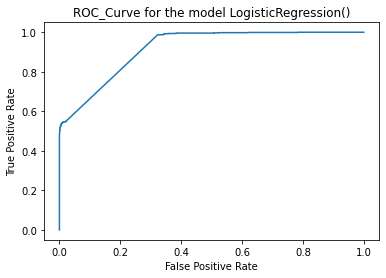

ROC AUC SCORE is- 0.7639647624419198


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7665284974093265


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7551255547462151




In [73]:
model(lr,X,y)

For model GaussianNB()
Training_Accuracy_Score= 0.8217616580310881
Testing_Accuracy_Score= 0.7974093264248705

 Classification Report-
               precision    recall  f1-score   support

           0       0.99      0.61      0.75       985
           1       0.71      0.99      0.83       945

    accuracy                           0.80      1930
   macro avg       0.85      0.80      0.79      1930
weighted avg       0.85      0.80      0.79      1930


 Confusion Metrix-
 [[600 385]
 [  6 939]]


AUC_ROC CURVE


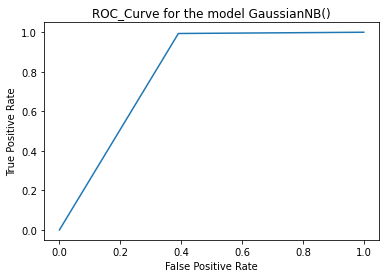

ROC AUC SCORE is- 0.8013939247441786


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.802279792746114


At the K-Fold 3 the CV score of model GaussianNB() is 0.807253752994431




In [74]:
model(gb,X,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.7766839378238342
Testing_Accuracy_Score= 0.7564766839378239

 Classification Report-
               precision    recall  f1-score   support

           0       0.69      0.95      0.80       985
           1       0.92      0.55      0.69       945

    accuracy                           0.76      1930
   macro avg       0.80      0.75      0.74      1930
weighted avg       0.80      0.76      0.75      1930


 Confusion Metrix-
 [[940  45]
 [425 520]]


AUC_ROC CURVE


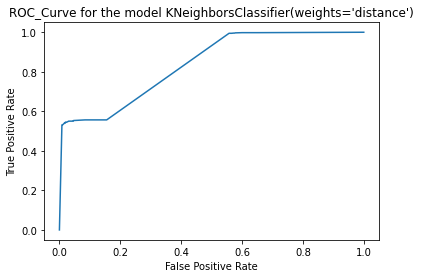

ROC AUC SCORE is- 0.7522896355383665


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.7281865284974094


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.6931630960316024




In [75]:
model(neighbor,X,y)

For model DecisionTreeClassifier(max_features='log2')
Training_Accuracy_Score= 0.8629533678756477
Testing_Accuracy_Score= 0.7844559585492228

 Classification Report-
               precision    recall  f1-score   support

           0       0.98      0.59      0.74       985
           1       0.70      0.99      0.82       945

    accuracy                           0.78      1930
   macro avg       0.84      0.79      0.78      1930
weighted avg       0.84      0.78      0.78      1930


 Confusion Metrix-
 [[578 407]
 [  9 936]]


AUC_ROC CURVE


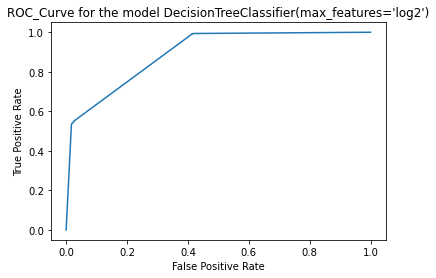

ROC AUC SCORE is- 0.7886391104665218


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.7620725388601036


At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.7817630709781319




In [76]:
model(dtc,X,y)

For model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2')
Training_Accuracy_Score= 0.8629533678756477
Testing_Accuracy_Score= 0.810880829015544

 Classification Report-
               precision    recall  f1-score   support

           0       0.99      0.64      0.77       985
           1       0.72      0.99      0.84       945

    accuracy                           0.81      1930
   macro avg       0.86      0.81      0.81      1930
weighted avg       0.86      0.81      0.81      1930


 Confusion Metrix-
 [[627 358]
 [  7 938]]


AUC_ROC CURVE


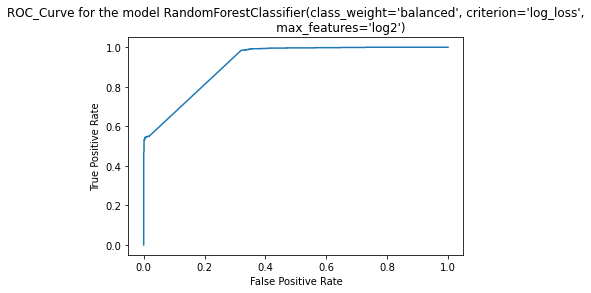

ROC AUC SCORE is- 0.8145704079714231


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.7967875647668394


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.8079810640095554




In [77]:
model(rfc,X,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7243523316062176
Testing_Accuracy_Score= 0.7259067357512954

 Classification Report-
               precision    recall  f1-score   support

           0       0.65      0.99      0.79       985
           1       0.98      0.45      0.62       945

    accuracy                           0.73      1930
   macro avg       0.81      0.72      0.70      1930
weighted avg       0.81      0.73      0.70      1930


 Confusion Metrix-
 [[975  10]
 [519 426]]


AUC_ROC CURVE


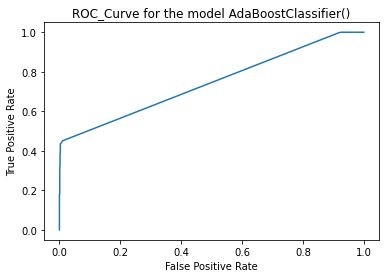

ROC AUC SCORE is- 0.7203206832648457


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.713782383419689


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.7201015374376691




In [78]:
model(ad,X,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt')
Training_Accuracy_Score= 0.7325129533678757
Testing_Accuracy_Score= 0.7383419689119171

 Classification Report-
               precision    recall  f1-score   support

           0       0.66      0.99      0.79       985
           1       0.97      0.48      0.64       945

    accuracy                           0.74      1930
   macro avg       0.82      0.73      0.72      1930
weighted avg       0.82      0.74      0.72      1930


 Confusion Metrix-
 [[973  12]
 [493 452]]


AUC_ROC CURVE


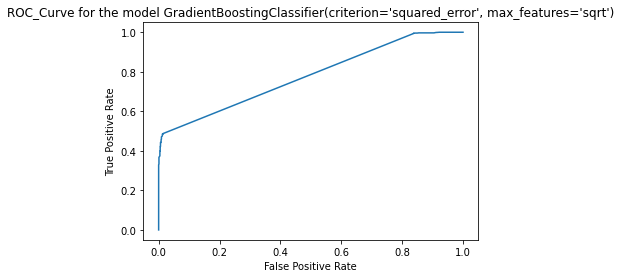

ROC AUC SCORE is- 0.7330620685950635


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.7232124352331606


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.7247645566592485




In [79]:
model(grd,X,y)

In [82]:
#Displaying all the model's score comparision
Bag_of_Words=pd.DataFrame({'Models':['Logistic Regression','Gaussian NB','K Neighbour Classifier','Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier'],'Training_Score%':[77,82,78,86,86,72,73],'Testing_Score%':[77,80,76,78,81,72,74],'F1_Score%':[77,80,76,78,81,73,74],'ROC_AUC_Score':[0.76,0.80,0.75,0.79,0.81,0.72,0.73]})
Bag_of_Words

,Models,Training_Score%,Testing_Score%,F1_Score%,ROC_AUC_Score
0,Logistic Regression,77,77,77,0.76
1,Gaussian NB,82,80,80,0.80
2,K Neighbour Classifier,78,76,76,0.75
3,Decision Tree Classifier,86,78,78,0.79
4,Random Forest Classifier,86,81,81,0.81
5,Ada Boost Classifier,72,72,73,0.72
6,Gradient Boosting Classifier,73,74,74,0.73


### Conclusion-
As we can see that Random forest classifier is best algorithm among all as it gives highest score as compare to others and also the cv score of this algorithm is equal to its testing accuracy which is highest among other.
ROC AUC score of this algorithm is 0.81 which is highest among all and it indicates that out of 100 times, 81 times our model is predicting right class. Hence RFC model works good while predicting the target variable.
Now let's find out the Model accuracy with the help of TFIDF model and check whether our model accuracy would change or not...Let's find out the same.

### 2.Creating the models with the help of Term Frequency - Inverse Document Frequency (TF-IDF)

In [83]:
### text_preprocessing---- word to vector transformation
### finding our features(x) with the help of TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2)) #max_feature will give us top 2500 fatures where as ngram_range will give us vocabulary containg one and two words each
X=tv.fit_transform(corpus).toarray()

In [84]:
###our feature for TF-IDF model
X ###we have converted each words of each sentences into vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
print(X.shape)
print('\n')
print('X[1]',X[1])
print('\n')
print('X[10]',X[10])
print('\n')
print('vocabulary_',tv.vocabulary_) ##we are getting all the unique vocabulary in the combination of one and two pair features which is generated from our texts dataset

(5572, 2500)


X[1] [0. 0. 0. ... 0. 0. 0.]


X[10] [0. 0. 0. ... 0. 0. 0.]


vocabulary_ {'unl': 2075, 'pn': 1663, 'crz': 407, 'nl': 1483, 'bug': 170, 'gre': 827, 'wrl': 2432, 'cne': 363, 'here': 975, 're': 1747, 'here re': 983, 'ok': 1565, 'lr': 1337, 'jkng': 1146, 'wf': 2267, 'ok lr': 1569, 'free': 723, 'enr': 563, 'wkl': 2348, 'cp': 380, 'wn': 2368, 'cup': 423, 'fnl': 679, 'tex': 1985, 'receve': 1791, 'quen': 1736, 'ppl': 1679, 'ver': 2193, 'free enr': 727, 'enr wkl': 566, 're ppl': 1772, 'un': 2062, 'erl': 584, 'hr': 1048, 'lre': 1342, 'hen': 955, 'nh': 1471, 'hnk': 1016, 'he': 860, 'ge': 768, 'uf': 2054, 'lve': 1354, 'run': 1894, 'hugh': 1061, 'hnk he': 1020, 'he ge': 884, 'he lve': 903, 'freemg': 733, 'rlng': 1861, 'been': 76, 'week': 2243, 'nw': 1537, 'wr': 2417, 'bck': 42, 'lke': 1266, 'fun': 760, 'up': 2083, 'fr': 684, 'll': 1278, 'xxx': 2462, 'en': 525, 'rcv': 1746, 'he here': 889, 'lke fun': 1268, 'up fr': 2087, 'fr ll': 700, 'even': 593, 'brher': 132, 'pek': 1608, 'wh': 22

In [99]:
#I'm again balancing the class for the TF-IDF model 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [100]:
y.value_counts()

0    4825
1    4825
Name: label, dtype: int64

In [101]:
print(X.shape)
print(y.shape)

(9650, 2500)
(9650,)


##### I've already defined the model definition earlier,so will directly run for each algorithms

For model LogisticRegression()
Training_Accuracy_Score= 0.9619170984455958
Testing_Accuracy_Score= 0.9658031088082901

 Classification Report-
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       985
           1       0.97      0.96      0.96       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930


 Confusion Metrix-
 [[959  26]
 [ 40 905]]


AUC_ROC CURVE


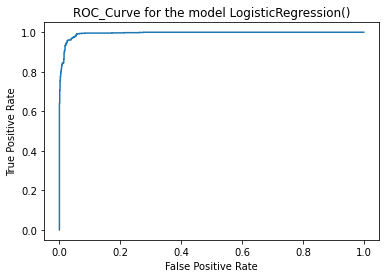

ROC AUC SCORE is- 0.9656380092928316


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.9459067357512954


At the K-Fold 3 the CV score of model LogisticRegression() is 0.9513986190176462




In [102]:
model(lr,X,y)

For model GaussianNB()
Training_Accuracy_Score= 0.9161917098445596
Testing_Accuracy_Score= 0.9181347150259067

 Classification Report-
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       985
           1       0.86      1.00      0.92       945

    accuracy                           0.92      1930
   macro avg       0.93      0.92      0.92      1930
weighted avg       0.93      0.92      0.92      1930


 Confusion Metrix-
 [[827 158]
 [  0 945]]


AUC_ROC CURVE


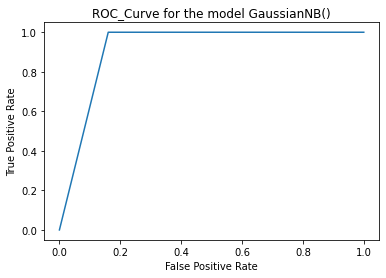

ROC AUC SCORE is- 0.9197969543147207


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.9140932642487046


At the K-Fold 3 the CV score of model GaussianNB() is 0.9146111608571998




In [103]:
model(gb,X,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.9996113989637305
Testing_Accuracy_Score= 0.6217616580310881

 Classification Report-
               precision    recall  f1-score   support

           0       0.96      0.27      0.42       985
           1       0.56      0.99      0.72       945

    accuracy                           0.62      1930
   macro avg       0.76      0.63      0.57      1930
weighted avg       0.77      0.62      0.57      1930


 Confusion Metrix-
 [[265 720]
 [ 10 935]]


AUC_ROC CURVE


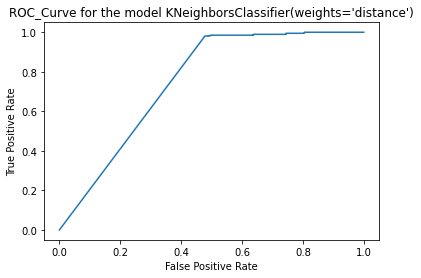

ROC AUC SCORE is- 0.6292267612064566


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.6078756476683937


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.6170982010989504




In [104]:
model(neighbor,X,y)

For model DecisionTreeClassifier(max_features='log2')
Training_Accuracy_Score= 0.9996113989637305
Testing_Accuracy_Score= 0.960621761658031

 Classification Report-
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       985
           1       0.96      0.96      0.96       945

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930


 Confusion Metrix-
 [[950  35]
 [ 41 904]]


AUC_ROC CURVE


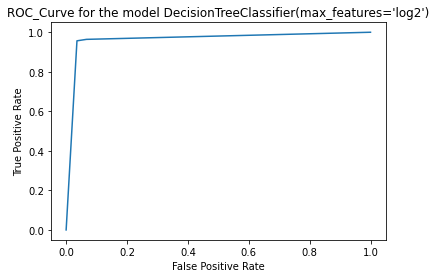

ROC AUC SCORE is- 0.9605403808449493


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.955958549222798


At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='log2') is 0.9556477533583765




In [105]:
model(dtc,X,y)

For model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2')
Training_Accuracy_Score= 0.9996113989637305
Testing_Accuracy_Score= 0.9870466321243523

 Classification Report-
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       985
           1       1.00      0.97      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930


 Confusion Metrix-
 [[984   1]
 [ 24 921]]


AUC_ROC CURVE


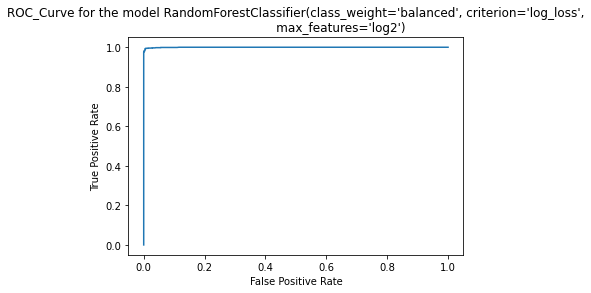

ROC AUC SCORE is- 0.9867939730883895


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.9859067357512954


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2') is 0.9895337322299497




In [106]:
model(rfc,X,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.9685233160621761
Testing_Accuracy_Score= 0.9720207253886011

 Classification Report-
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       985
           1       0.97      0.97      0.97       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930


 Confusion Metrix-
 [[960  25]
 [ 29 916]]


AUC_ROC CURVE


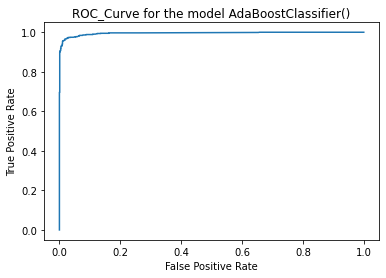

ROC AUC SCORE is- 0.9719657293261355


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.9626943005181348


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.9640419869876604




In [107]:
model(ad,X,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt')
Training_Accuracy_Score= 0.9603626943005181
Testing_Accuracy_Score= 0.9559585492227979

 Classification Report-
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       985
           1       0.98      0.93      0.95       945

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930


 Confusion Metrix-
 [[970  15]
 [ 70 875]]


AUC_ROC CURVE


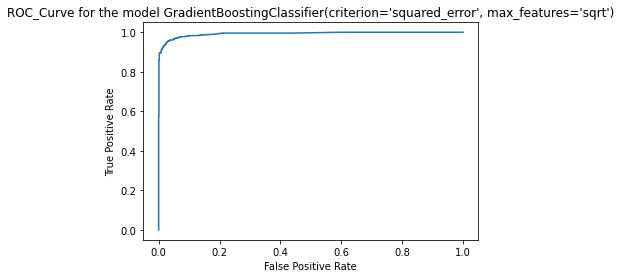

ROC AUC SCORE is- 0.9553487497649934


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.9572020725388601


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='sqrt') is 0.957720689630286




In [108]:
model(grd,X,y)

In [109]:
#Displaying all the model's score comparision
TFIDF=pd.DataFrame({'Models':['Logistic Regression','Gaussian NB','K Neighbour Classifier','Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier'],'Training_Score%':[96,91,100,100,100,97,96],'Testing_Score%':[96,92,62,96,99,97,96],'F1_Score%':[97,92,62,96,99,97,96],'ROC_AUC_Score':[0.96,0.92,0.63,0.96,0.99,0.97,0.95]})
TFIDF

,Models,Training_Score%,Testing_Score%,F1_Score%,ROC_AUC_Score
0,Logistic Regression,96,96,97,0.96
1,Gaussian NB,91,92,92,0.92
2,K Neighbour Classifier,100,62,62,0.63
3,Decision Tree Classifier,100,96,96,0.96
4,Random Forest Classifier,100,99,99,0.99
5,Ada Boost Classifier,97,97,97,0.97
6,Gradient Boosting Classifier,96,96,96,0.95


### Conclusion-
As you can see that after applying the TF-IDF model our model's accuracy got increased by 15-25% which is really a great achievemnt in predicting the spam detections.
Random Forest Classifier is the best model for achieving  the same having almost 100% accuracy across all the parameters and that indicates our model is predicting, spam as spam and ham as ham, 100 out of 100 times.

### Saving the Best Model

In [110]:
import joblib

In [111]:
file='spam.obj'
joblib.dump(rfc,file)

['spam.obj']

In [112]:
a=joblib.load('spam.obj')
a

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2')

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

###### ------------ I've already acheived the best accuracy with the help of TF-IDF method but for further learning experience now let's explore some of the techniques of Word2Vec model ------------------ 

## 3.Creating the models with the help of Word2Vec

In [10]:
!pip install gensim

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()  #lemmatizing

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z0-9]', ' ',df['texts'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [18]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply

In [19]:
corpus[1054]

'hiya comin 2 bristol 1 st week april le got rudi new yr eve snoring drunk u bak college yet work sends ink 2 bath'

In [20]:
len(corpus)

5572

In [21]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
words=[]
for sentence in corpus:
    sentence_token=sent_tokenize(sentence)
    for sentence in sentence_token:
        words.append(simple_preprocess(sentence)) #this will lowercase each words also we can use sentence.lower() for same

In [24]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  're

In [25]:
len(words)

5565

##### Here I'm not using the pretrained model for dimension purpose as i'm going to create my own from scratch

In [97]:
import gensim

In [98]:
#pretrained model-
#import gensim.downloader as api
#wv=api.load('word2vec-google-news-300')

###Let's train our Word2Vec from Scratch
model=gensim.models.Word2Vec(words,window=5,min_count=2) 
#here my dimension i.e. vector_size is 100 by default

In [99]:
#getting all the vocabulary of the corpus
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'free',
 'day',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'text',
 'love',
 'want',
 'send',
 'need',
 'txt',
 'one',
 'today',
 'going',
 'home',
 'stop',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'think',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'pls',
 'please',
 'co',
 'msg',
 'make',
 'dear',
 'message',
 'night',
 'well',
 'say',
 'min',
 'thing',
 'much',
 'claim',
 'great',
 'oh',
 'hope',
 'hey',
 'number',
 'wat',
 'friend',
 'happy',
 'work',
 'give',
 'way',
 'yes',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'ask',
 'win',
 'cash',
 'said',
 'yeah',
 'really',
 'life',
 'amp',
 'tone',
 'babe',
 'im',
 'meet',
 'find',
 'morning',
 'service',
 'uk',
 'miss',
 'thanks',
 'last',
 'would',
 'com',
 'year',
 'anything',
 'lol',
 'nokia',
 'also',
 'care',
 'every',
 'feel',
 'pick',
 'keep',
 'sure',
 'urgent',
 'sent',
 'contact',


In [29]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

3542


In [30]:
type(model.wv.index_to_key)

list

In [31]:
model.corpus_count

5565

In [32]:
model.epochs

5

In [33]:
model.wv.similar_by_word('prize')

[('claim', 0.9994460940361023),
 ('line', 0.9990959167480469),
 ('call', 0.9990867972373962),
 ('show', 0.9990702271461487),
 ('cash', 0.9990089535713196),
 ('draw', 0.998968780040741),
 ('guaranteed', 0.9989369511604309),
 ('service', 0.9988253712654114),
 ('contact', 0.998762309551239),
 ('please', 0.9987269043922424)]

In [34]:
model.wv.similar_by_word('love')

[('thing', 0.9997581243515015),
 ('amp', 0.9997565746307373),
 ('really', 0.9997379183769226),
 ('one', 0.9997180104255676),
 ('day', 0.9997173547744751),
 ('see', 0.9997135400772095),
 ('need', 0.9997119307518005),
 ('think', 0.9997089505195618),
 ('make', 0.9997015595436096),
 ('get', 0.9996969699859619)]

In [35]:
model.wv.similar_by_word('year')

[('get', 0.9995875358581543),
 ('day', 0.999570906162262),
 ('see', 0.9995586276054382),
 ('one', 0.9995462894439697),
 ('know', 0.9995448589324951),
 ('even', 0.9995323419570923),
 ('like', 0.999531626701355),
 ('got', 0.999523401260376),
 ('today', 0.9995091557502747),
 ('make', 0.9994978904724121)]

In [36]:
model.wv.similar_by_word('finished')

[('hi', 0.9971778988838196),
 ('ask', 0.9971778392791748),
 ('like', 0.9971355199813843),
 ('house', 0.9971240758895874),
 ('think', 0.9971181154251099),
 ('want', 0.9971038699150085),
 ('right', 0.9970917105674744),
 ('girl', 0.9970828890800476),
 ('sweet', 0.9970574378967285),
 ('gud', 0.9970546364784241)]

In [37]:
model.wv.get_vector('finished')

array([-0.04068335,  0.09759377,  0.02331979,  0.001029  ,  0.01700729,
       -0.15323852,  0.0353117 ,  0.18171297, -0.07845245, -0.05291268,
       -0.04455676, -0.13094698,  0.01508812,  0.03219301,  0.01681183,
       -0.06394736, -0.01392787, -0.09844241,  0.00821557, -0.16684888,
        0.06028414,  0.04738954,  0.01495379, -0.04281912, -0.04881551,
       -0.01680192, -0.0642742 , -0.05557336, -0.07769203,  0.01924125,
        0.09586381, -0.0075827 ,  0.00342442, -0.07164598, -0.04940723,
        0.11279412,  0.00945752, -0.08269922, -0.03909942, -0.1843321 ,
        0.00467766, -0.10177289, -0.02101724,  0.01435962,  0.10427517,
       -0.03355181, -0.07768315, -0.01644888,  0.09508075,  0.05005308,
        0.04050076, -0.0935237 , -0.0203615 , -0.02761556, -0.0615468 ,
        0.05273142,  0.05579337, -0.0213798 , -0.10833829, -0.00205062,
        0.04880014,  0.01110327, -0.02252274, -0.01354612, -0.11008116,
        0.08911394,  0.02522404,  0.05292698, -0.08993807,  0.11

In [38]:
model.wv['think'].shape

(100,)

In [39]:
model.wv['finished'].shape

(100,)

In [40]:
model.wv['claim'].shape

(100,)

In [41]:
words[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [42]:
words[73]

['performed']

In [43]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [44]:
###Creating Progress Meter or Progress Bars
!pip install tqdm

In [45]:
from tqdm import tqdm

In [100]:
#apply for the entire sentences/documents
x=[]
for i in tqdm(range(len(words))):
    x.append(avg_word2vec(words[i]))

100%|█████████████████████████████████████████████████████████████████████████████| 5565/5565 [00:12<00:00, 437.77it/s]


In [101]:
x

[array([-0.13884145,  0.260518  ,  0.07067171,  0.00325674,  0.03183277,
        -0.41251397,  0.08750454,  0.5075656 , -0.1977644 , -0.1539705 ,
        -0.14423119, -0.3806449 ,  0.03108945,  0.06695426,  0.02499076,
        -0.16233592, -0.01031428, -0.24780005, -0.01200705, -0.46170703,
         0.13478166,  0.11376521,  0.04179333, -0.06548674, -0.14876278,
        -0.02393963, -0.19290859, -0.14476787, -0.19734508,  0.01992759,
         0.2905268 ,  0.00476224,  0.02203989, -0.17057739, -0.14062512,
         0.27393168,  0.0338516 , -0.21227777, -0.081187  , -0.46590853,
         0.04828877, -0.2873521 , -0.06120551,  0.04061613,  0.25522196,
        -0.0862672 , -0.19507886, -0.012138  ,  0.23328066,  0.11626446,
         0.10872602, -0.22784144, -0.05092739, -0.08652616, -0.1812538 ,
         0.15531342,  0.1639969 , -0.06776994, -0.299807  ,  0.00812809,
         0.09591403,  0.03555806, -0.04783009, -0.03022053, -0.2872426 ,
         0.22847931,  0.07200708,  0.14779879, -0.2

In [102]:
type(x)

list

In [109]:
#I'll convert the list into array
X=np.array(x)

In [110]:
type(X)

numpy.ndarray

In [111]:
#features
X

array([array([-0.13884145,  0.260518  ,  0.07067171,  0.00325674,  0.03183277,
              -0.41251397,  0.08750454,  0.5075656 , -0.1977644 , -0.1539705 ,
              -0.14423119, -0.3806449 ,  0.03108945,  0.06695426,  0.02499076,
              -0.16233592, -0.01031428, -0.24780005, -0.01200705, -0.46170703,
               0.13478166,  0.11376521,  0.04179333, -0.06548674, -0.14876278,
              -0.02393963, -0.19290859, -0.14476787, -0.19734508,  0.01992759,
               0.2905268 ,  0.00476224,  0.02203989, -0.17057739, -0.14062512,
               0.27393168,  0.0338516 , -0.21227777, -0.081187  , -0.46590853,
               0.04828877, -0.2873521 , -0.06120551,  0.04061613,  0.25522196,
              -0.0862672 , -0.19507886, -0.012138  ,  0.23328066,  0.11626446,
               0.10872602, -0.22784144, -0.05092739, -0.08652616, -0.1812538 ,
               0.15531342,  0.1639969 , -0.06776994, -0.299807  ,  0.00812809,
               0.09591403,  0.03555806, -0.04783009,

In [112]:
len(X)

5565

In [113]:
##now each sentence are having 100 dimension with the help of AvgWord2Vec as earlier in word2vec each words are having 100
X[0].shape

(100,)

In [114]:
#target
y=np.array(y)
y

array([0, 0, 1, ..., 0, 0, 0])

###### Now We have got the feature and label so we can create the model and check the accuracy